# Classification (Predicting Withdrawals)

#### Reason I Created This Dataset
I created this dataset because I could not find an existing dataset that had all necessary columns to predict employee widrawals from their accessible retirement savings pot. Most available dataset lacked ritical components such as retirement behaviour and income levels. By creating this dataset, I aimed to esure comprehensive analysis of the factors influencing widrawal behaviour among employees.

### Data Preparation

In [5]:
# import all necessary libaries
import pandas as pd # For analysing and loading the dataset
import numpy as np # For mathematical purposes
from sklearn.model_selection import train_test_split # For splitting the training and test sets
from sklearn.ensemble import RandomForestClassifier # For Random Forest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
# Load the dataset
url = "/content/sample_data/employee_financial_behaviour.csv"
df = pd.read_csv(url)

In [7]:
# Get the five rows of the dataset
df.head()

,Age,Gender,Marital Status,Income Level,Savings Rate,Retirement Savings,Withdrawal Behavior,Inflation Rate,Interest Rate
0,60,Male,Married,66826,0.132003,8821.218329,0,1.887127,0.547482
1,50,Male,Married,47738,0.136311,6507.234000,0,2.877754,0.911418
2,36,Female,Divorced,68299,0.053321,3641.786095,0,1.589892,3.005774
3,64,Male,Divorced,52593,0.191767,10085.608579,1,1.950927,4.513429
4,29,Female,Married,25438,0.154494,3930.020679,0,2.513855,1.792241


In [8]:
# get dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   int64  
 1   Gender               1000 non-null   object 
 2   Marital Status       1000 non-null   object 
 3   Income Level         1000 non-null   int64  
 4   Savings Rate         1000 non-null   float64
 5   Retirement Savings   1000 non-null   float64
 6   Withdrawal Behavior  1000 non-null   int64  
 7   Inflation Rate       1000 non-null   float64
 8   Interest Rate        1000 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 70.4+ KB


In [9]:
# get dataset statistics
df.describe()

,Age,Income Level,Savings Rate,Retirement Savings,Withdrawal Behavior,Inflation Rate,Interest Rate
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,43.014000,60776.957000,0.125970,7659.282991,0.284000,1.966644,2.781398
std,12.333772,15497.139689,0.043254,3384.799032,0.451162,0.591999,1.278074
min,22.000000,16477.000000,0.050202,1462.513598,0.000000,1.001255,0.507205
25%,32.000000,50777.500000,0.088865,4969.257565,0.000000,1.440066,1.738289
50%,44.000000,61155.000000,0.127041,7201.210739,0.000000,1.962760,2.808597
75%,54.000000,71133.500000,0.164111,9904.261820,1.000000,2.467639,3.863903
max,64.000000,108907.000000,0.199643,18466.310052,1.000000,2.999698,4.998882


In [12]:
# get the shape (The rows and columns)
df.shape

(1000, 9)

In [13]:
# get the size
df.size

9000

### Data PreProcessing

In [14]:
# Check if there are any null values
df.isnull().sum()

,0
Age,0
Gender,0
Marital Status,0
Income Level,0
Savings Rate,0
Retirement Savings,0
Withdrawal Behavior,0
Inflation Rate,0
Interest Rate,0


In [17]:
#Check if there are any duplicates
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [19]:
# get column names
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Income Level', 'Savings Rate',
       'Retirement Savings', 'Withdrawal Behavior', 'Inflation Rate',
       'Interest Rate'],
      dtype='object')

### Data Visualisation

Withdrawal Behavior
0    43.0
1    45.0
Name: Age, dtype: float64


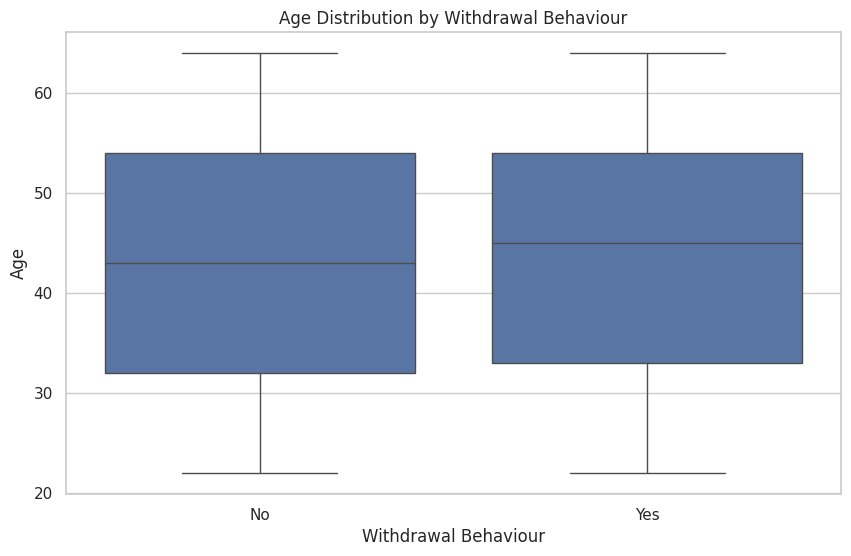

In [28]:
# Visualisation for the age distribution y withdrawal behaviour

import seaborn as sns # For advanced visualisation
import matplotlib.pyplot as plt # For visualisation

# set theme
sns.set_theme()
sns.set_style("whitegrid")

median_ages = df.groupby('Withdrawal Behavior')['Age'].median()
print(median_ages)

plt.figure(figsize=(10,6))
sns.boxplot(x='Withdrawal Behavior', y='Age', data=df)
plt.title('Age Distribution by Withdrawal Behaviour')
plt.xlabel('Withdrawal Behaviour')
plt.ylabel('Age')
plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.show()

Based on the visualisation and the median ages, we can observe that older employees are more likely to withdraw from the accessible pot. This trend might be explained by the fact that many older individuals may have retired and are already relying on their savings. Additionally, as breadwinners, they might use the money to support their famillie or cover essential expenses such as medication and other basic needs. Their life circumstances, such as healthcare costs or providibng for dependants, could be significant factors contributing to the higher withdrawal rate among older employees.

### Data Modeling - Random Forest Classification

In [29]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Income Level', 'Savings Rate',
       'Retirement Savings', 'Withdrawal Behavior', 'Inflation Rate',
       'Interest Rate'],
      dtype='object')

In [36]:
# Define features and target variable
X = df.drop('Withdrawal Behavior', axis=1) # Features
y = df['Withdrawal Behavior'] # Target variable

# Encode categorical variable
X = pd.get_dummies(X, drop_first=True)

# split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) # use 20% testing data

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make prediction
prediction = rf_classifier.predict(X_test)

# Evaluate the model
c_matrix = confusion_matrix(y_test,prediction)
c_report = classification_report(y_test,prediction)


# print the results
print('Prediction:',prediction)
print('Confusion Matrix:',c_matrix)
print('Classification Report:',c_report)

Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Confusion Matrix: [[135   9]
 [ 50   6]]
Classification Report:               precision    recall  f1-score   support

           0       0.73      0.94      0.82       144
           1       0.40      0.11      0.17        56

    accuracy                           0.70       200
   macro avg       0.56      0.52      0.49       200
weighted avg       0.64      0.70      0.64       200

